In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [664]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [665]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [666]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [667]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [668]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [669]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [670]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [671]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [672]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [673]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [674]:
train['Embarked'].fillna('S',inplace=True)

In [675]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [676]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [677]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [678]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [679]:
train_age

array([42, 15, 36, 31, 29, 36, 43, 26, 28, 24, 17, 26, 20, 24, 33, 38, 24,
       36, 34, 24, 24, 24, 30, 28, 16, 39, 40, 22, 23, 41, 36, 41, 38, 18,
       37, 33, 34, 20, 43, 27, 40, 21, 40, 19, 27, 28, 43, 35, 39, 40, 25,
       21, 31, 43, 41, 15, 33, 42, 36, 36, 21, 30, 36, 23, 25, 23, 38, 24,
       23, 34, 21, 25, 39, 27, 19, 43, 40, 27, 34, 28, 21, 36, 24, 21, 26,
       29, 25, 23, 17, 33, 18, 38, 26, 27, 20, 28, 22, 40, 22, 21, 36, 24,
       34, 35, 37, 19, 35, 35, 28, 20, 20, 22, 38, 42, 33, 39, 22, 25, 28,
       24, 38, 25, 19, 36, 32, 31, 26, 29, 16, 37, 21, 31, 31, 17, 42, 42,
       39, 23, 41, 27, 31, 26, 24, 15, 24, 38, 38, 28, 36, 16, 31, 38, 27,
       15, 31, 21, 31, 20, 16, 31, 31, 35, 35, 28, 23, 38, 39, 33, 22, 43,
       35, 15, 39, 34, 37, 33, 15])

In [680]:
train['Age'][np.isnan(train['Age'])]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [681]:
import warnings
warnings.filterwarnings('ignore')

In [682]:
train['Age'][np.isnan(train['Age'])]=train_age

In [683]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [684]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)

In [685]:
test['Age'][np.isnan(test['Age'])]=test_age

In [686]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [687]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [688]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [689]:
train[train['Pclass']==1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [690]:
train[train['Pclass']==2]['Survived'].value_counts()

Survived
0    97
1    87
Name: count, dtype: int64

In [691]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [692]:
train[['Pclass', 'Survived']].groupby('Pclass').value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [693]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [694]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [695]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [696]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [697]:
train[['Embarked','Survived']].groupby('Embarked').mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.900929


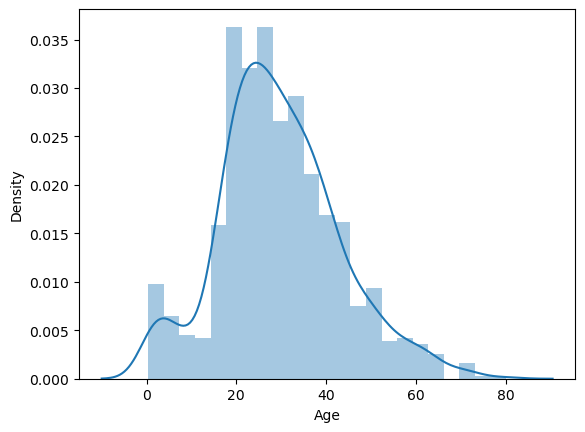

In [698]:
sns.distplot(train['Age'])
plt.show()

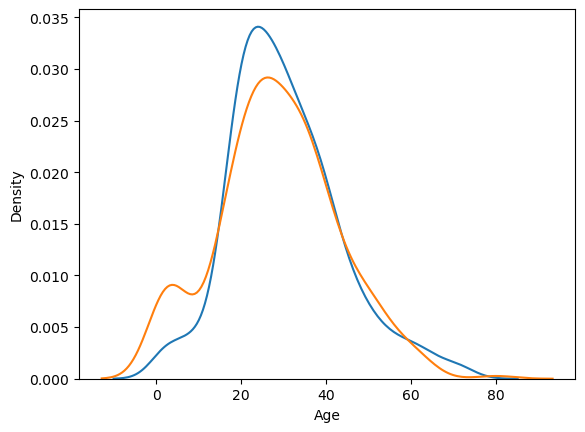

In [699]:
sns.kdeplot(train['Age'][train['Survived']==0])
sns.kdeplot(train['Age'][train['Survived']==1])
plt.show()

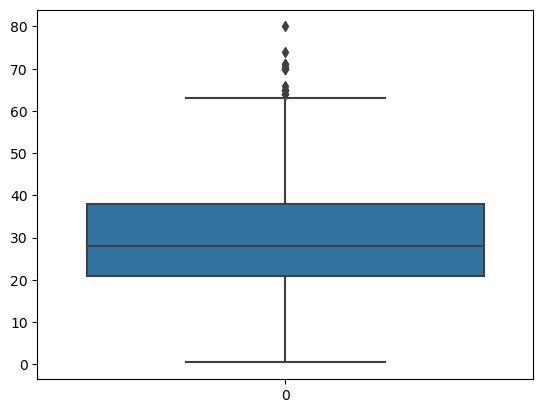

In [700]:
sns.boxplot(train['Age'])
plt.show()

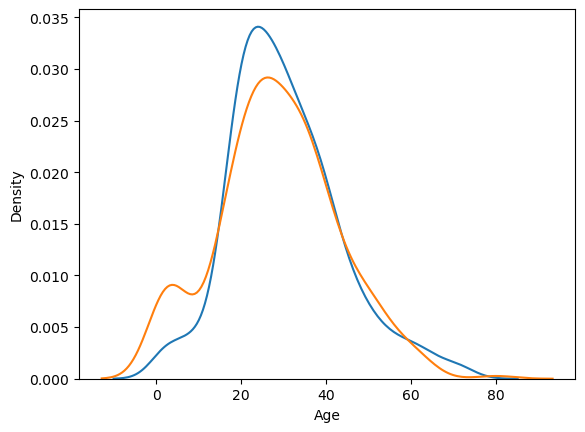

In [701]:
#plt.subplots(figsize=(15,4))
sns.kdeplot(train[train['Survived']==0]['Age'])
sns.kdeplot(train[train['Survived']==1]['Age'])
plt.show()

In [702]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [703]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

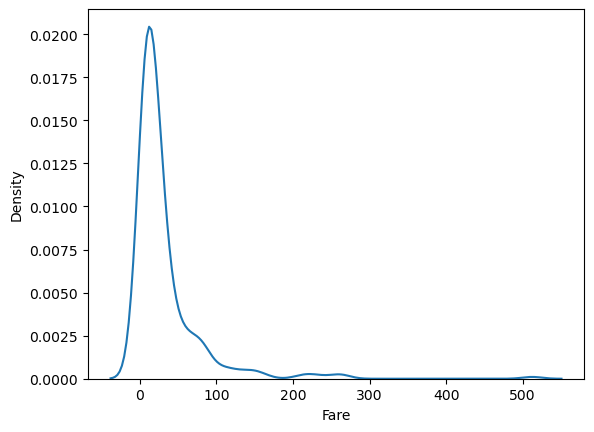

In [704]:
sns.kdeplot(train['Fare'])
plt.show()

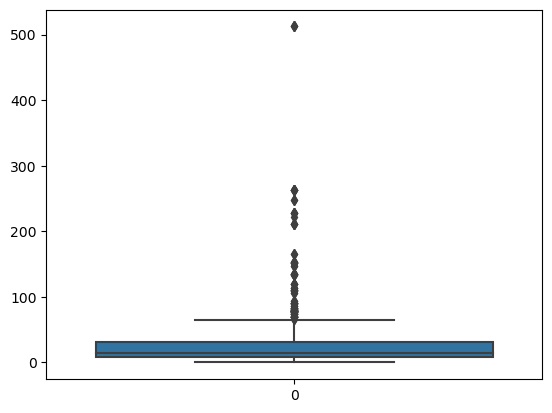

In [705]:
sns.boxplot(train['Fare'])
plt.show()

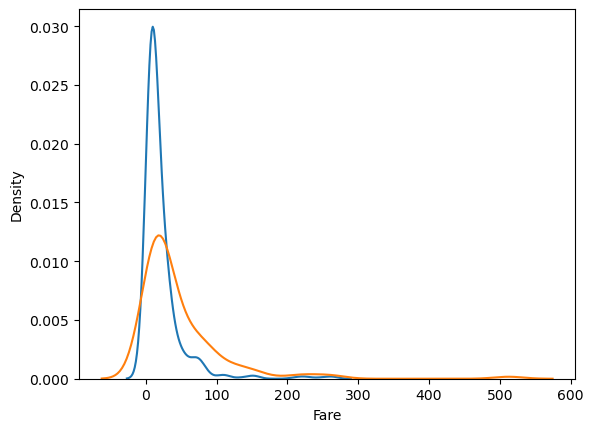

In [706]:
sns.kdeplot(train[train['Survived']==0]['Fare'])
sns.kdeplot(train[train['Survived']==1]['Fare'])
plt.show()

In [707]:
train.drop(columns=['Fare'], inplace=True)
test.drop(columns=['Fare'], inplace=True)

In [708]:
train['Family']=train['SibSp'] + train['Parch'] + 1
test['Family']=test['SibSp'] + test['Parch'] + 1

In [709]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [710]:
train['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [711]:
train[['Family','Survived']].groupby('Family').mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [712]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [713]:
family_size(5)

'Large'

In [714]:
train['Family_size']=train['Family'].apply(family_size)

In [715]:
test['Family_size']=test['Family'].apply(family_size)

In [716]:
train.drop(columns=['Family'],inplace=True)
test.drop(columns=['Family'],inplace=True)

In [717]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


In [718]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Embarked       0
Family_size    0
dtype: int64

In [719]:
PassengerID = test['PassengerId'].values

In [720]:
train.drop(columns=['Name', 'PassengerId'],inplace=True)
test.drop(columns=['Name', 'PassengerId'],inplace=True)

In [721]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family_size    0
dtype: int64

In [722]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Embarked       0
Family_size    0
dtype: int64

In [723]:
train.shape

(891, 6)

In [724]:
test.shape

(418, 5)

In [725]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    object 
 5   Family_size  891 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [726]:
train = pd.get_dummies(train, columns = ['Pclass','Sex','Embarked','Family_size'], drop_first = True)
test = pd.get_dummies(test, columns = ['Pclass','Sex','Embarked','Family_size'], drop_first = True)

In [727]:
train.shape

(891, 9)

In [728]:
test.shape

(418, 8)

In [729]:
train.head(2)

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Small
0,0,22.0,False,True,True,False,True,False,True
1,1,38.0,False,False,False,False,False,False,True


In [730]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

In [731]:
X

array([[22.0, False, True, ..., True, False, True],
       [38.0, False, False, ..., False, False, True],
       [26.0, False, True, ..., True, False, False],
       ...,
       [15.0, False, True, ..., True, False, True],
       [26.0, False, False, ..., False, False, False],
       [32.0, False, True, ..., False, False, False]], dtype=object)

In [732]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [803]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [804]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [805]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [806]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb
}

In [807]:
from sklearn.metrics import accuracy_score

In [808]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    #precision = precision_score(y_test,y_pred)
    
    return accuracy

In [809]:
accuracy_scores = []
for name,clf in clfs.items():
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)

In [810]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [811]:
performance_df

,Algorithm,Accuracy
3,DT,0.843575
9,GBDT,0.843575
10,XGB,0.843575
4,LR,0.826816
7,BgC,0.826816
6,AdaBoost,0.804469
13,BNB,0.798883
5,RF,0.793296
1,KN,0.787709
11,GNB,0.787709


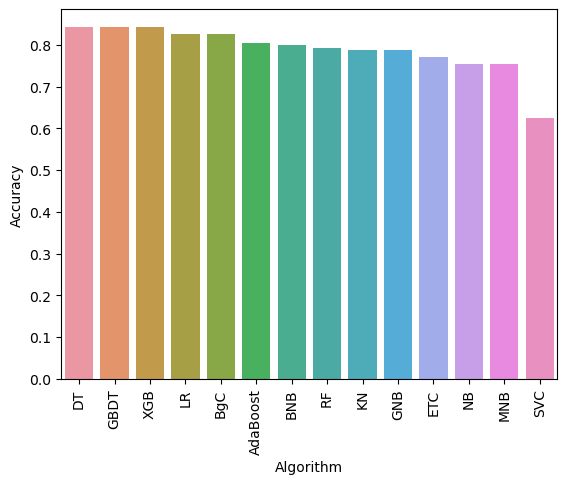

In [812]:
sns.barplot(x = performance_df['Algorithm'], y = performance_df['Accuracy'])
plt.xticks(rotation = 'vertical')
plt.show()

In [813]:
clf = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [814]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [815]:
y_pred=clf.predict(X_test)

In [816]:
y_pred.shape

(179,)

In [817]:
y_test.shape

(179,)

In [818]:
accuracy_score(y_test,y_pred)

0.8435754189944135

In [819]:
Xf = test.iloc[:, :].values

In [820]:
Xf

array([[34.5, False, True, ..., False, False, False],
       [47.0, False, True, ..., True, False, True],
       [62.0, True, False, ..., False, False, False],
       ...,
       [38.5, False, True, ..., True, False, False],
       [28.0, False, True, ..., True, False, False],
       [40.0, False, True, ..., False, False, True]], dtype=object)

In [821]:
yf=clf.predict(Xf)

In [822]:
yf.shape

(418,)

In [823]:
submission=pd.DataFrame()

In [824]:
submission['PassengerId']=PassengerID
submission['Survived']=yf

In [825]:
submission.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [826]:
submission.to_csv('submission.csv', index=False)